# Exercise 1.7

# (a)

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import scipy.io
plt.rcParams['figure.figsize'] = [10, 10]
plt.rcParams.update({'font.size': 18})

mat_contents = scipy.io.loadmat(os.path.join('VORTALL'))

In [2]:
X=mat_contents['VORTALL']

In [3]:
type(X)

numpy.ndarray

In [4]:
X.shape

(89351, 151)

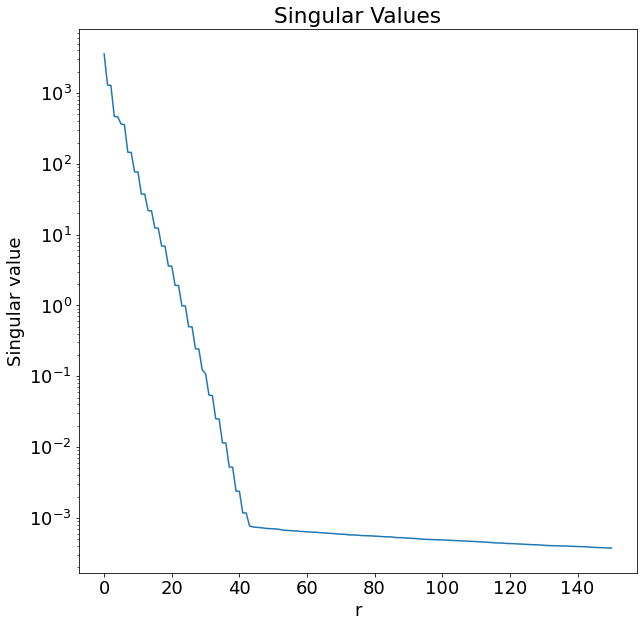

In [5]:
U,S,VT = np.linalg.svd(X,full_matrices=0)
S = np.diag(S)
plt.semilogy(np.diag(S))
plt.title('Singular Values')
plt.xlabel('r')
plt.ylabel('Singular value')
plt.show()

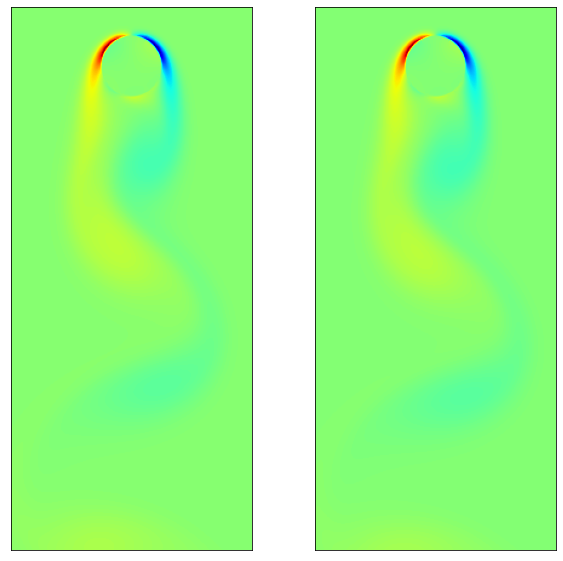

In [6]:

X1=np.copy(np.real(np.reshape(X[:,0],(449,199))))
X2=np.copy(np.real(np.reshape(X[:,1],(449,199))))
M=[X1,X2]
plt.figure()
for i in range(0,2):
    plt.subplot(1,2,i+1)
    plt.imshow(M[i],cmap='jet')
    plt.xticks([])
    plt.yticks([])

#plt.imshow(X1,cmap='jet')
plt.show()

In [7]:
# plot the movie of vortall
from PIL import Image
movie=[]
for i in range(150):
    M=np.copy(np.real(np.reshape(X[:,i],(449,199))))
    M=255*M
    movie.append(Image.fromarray(M))
movie[0].save('vortall.gif', save_all=True, append_images=movie[1:],duration=40, loop=0)

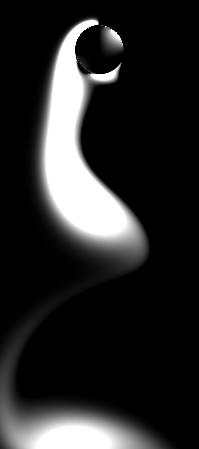

# (b)

In [8]:
# take r=20 for svd
r1=20
U, S, VT = np.linalg.svd(X, full_matrices=False)
S= np.diag(S)
X20= U[:,:r1] @ S[0:r1,:r1] @ VT[:r1,:]
movie20=[]
for i in range(150):
    M20=np.copy(np.real(np.reshape(X20[:,i],(449,199))))
    M20=255*M20
    movie20.append(Image.fromarray(M20))
movie20[0].save('vortall20.gif', save_all=True, append_images=movie20[1:],duration=40, loop=0)

In [9]:
# take r=50 for svd
r2=50
U1, S1, VT1 = np.linalg.svd(X, full_matrices=False)
S1 = np.diag(S1)
X50= U1[:,:r2] @ S1[0:r2,:r2] @ VT1[:r2,:]
movie50=[]
for i in range(150):
    M50=np.copy(np.real(np.reshape(X50[:,i],(449,199))))
    M50=255*M50
    movie50.append(Image.fromarray(M50))
movie50[0].save('vortall50.gif', save_all=True, append_images=movie50[1:],duration=40, loop=0)

In [10]:
# Compute r needed to capture 90% of the flow energy based on the singular value spectrum
E1=[]
for r in range(150):
  Xapprox = U[:,:r] @ S[0:r,:r] @ VT[:r,:]
  Ra= np.linalg.norm(X-Xapprox, ord = 'fro') / np.linalg.norm(X, ord = 'fro') 
  E1.append(1 - np.square(Ra))
for i in range(len(E1)):
    if E1[i]>=0.9:
        print(i)
        break

3


In [11]:
# Compute r needed to capture 99% of the flow energy based on the singular value spectrum
E2=[]
for r in range(150):
  Xapprox = U[:,:r] @ S[0:r,:r] @ VT[:r,:]
  Ra= np.linalg.norm(X-Xapprox, ord = 'fro') / np.linalg.norm(X, ord = 'fro') 
  E2.append(1 - np.square(Ra))
for i in range(len(E2)):
    if E2[i]>=0.99:
        print(i)
        break

7


In [12]:
# Compute r needed to capture 99.9% of the flow energy based on the singular value spectrum
E3=[]
for r in range(150):
  Xapprox = U[:,:r] @ S[0:r,:r] @ VT[:r,:]
  Ra= np.linalg.norm(X-Xapprox, ord = 'fro') / np.linalg.norm(X, ord = 'fro') 
  E3.append(1 - np.square(Ra))
for i in range(len(E3)):
    if E3[i]>=0.999:
        print(i)
        break

9


In [13]:
# take r=3 for svd
r3=3
X3= U[:,:r3] @ S[0:r3,:r3] @ VT[:r3,:]
movie3=[]
for i in range(150):
    M3=np.copy(np.real(np.reshape(X3[:,i],(449,199))))
    M3=255*M3
    movie3.append(Image.fromarray(M3))
movie3[0].save('vortall3.gif', save_all=True, append_images=movie3[1:],duration=40, loop=0)

In [14]:
# take r=7 for svd
r7=7
X7= U[:,:r7] @ S[0:r7,:r7] @ VT[:r7,:]
movie7=[]
for i in range(150):
    M7=np.copy(np.real(np.reshape(X7[:,i],(449,199))))
    M7=255*M7
    movie7.append(Image.fromarray(M7))
movie7[0].save('vortall7.gif', save_all=True, append_images=movie7[1:],duration=40, loop=0)

In [15]:
# take r=9 for svd
r9=9
X9= U[:,:r9] @ S[0:r9,:r9] @ VT[:r9,:]
movie9=[]
for i in range(150):
    M9=np.copy(np.real(np.reshape(X9[:,i],(449,199))))
    M9=255*M9
    movie9.append(Image.fromarray(M9))
movie9[0].save('vortall9.gif', save_all=True, append_images=movie9[1:],duration=40, loop=0)

 Compute the squared Frobenius norm of the error between the true matrix $X$ and the reconstructed matrix $\tilde{X}$

In [16]:
e3=np.square(np.linalg.norm(X3-X, ord = 'fro'))
e3

753361.9261268075

In [17]:
e7=np.square(np.linalg.norm(X7-X, ord = 'fro'))
e7

58418.884826207424

In [18]:
e9=np.square(np.linalg.norm(X9-X, ord = 'fro'))
e9

16046.286492899007

# (c)

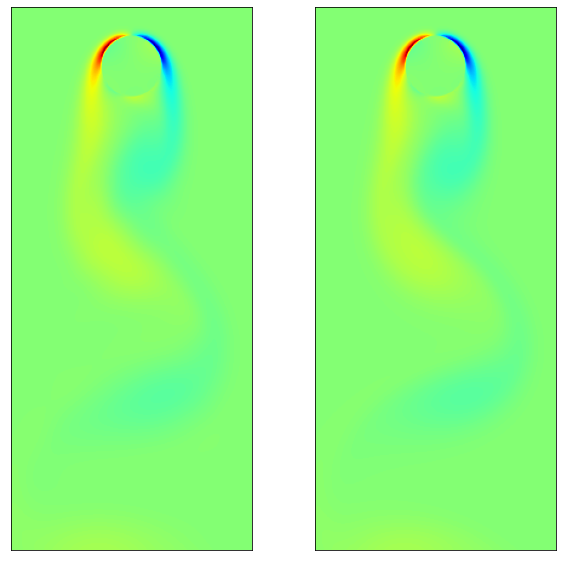

In [19]:
# take r=10 for svd
r10=10
k=2
W10= S[0:r10,:r10] @ VT[:r10,:]
Xapprox2=U[:,:10] @ W10
Xtrue2=X[:,1]
Xapprox2=np.copy(np.real(np.reshape(Xapprox2[:,1],(449,199))))
Xtrue2=np.copy(np.real(np.reshape(Xtrue2,(449,199))))
MM=[Xapprox2,Xtrue2]
plt.figure()
for i in range(0,2):
    plt.subplot(1,2,i+1)
    plt.imshow(MM[i],cmap='jet')
    plt.xticks([])
    plt.yticks([])
plt.show()

# (d)

Create a matrix $W$ with the first $1$ through $m-1$ columns of $\Sigma V^{*}$

In [20]:
m=VT.shape[0]
m

151

In [21]:
Y=S@VT
W=Y[:,:(m-1)]
W.shape

(151, 150)

Create a matrix Wprime with the first $2$ through $m$ columns of $\Sigma V^{*}$

In [22]:
Y=S@VT
Wprime=Y[:,1:m]
Wprime.shape

(151, 150)

In [23]:
# Compute the SVD of W
UW,SW,VWT = np.linalg.svd(W,full_matrices=0)
nzero=np.count_nonzero(SW)
nzero

150

In [24]:
# Solve A by Wprime = AW
SWinverse=np.diag(1./(SW))
A=Wprime @ VWT.T @ SWinverse @ UW.T
A.shape

(151, 151)

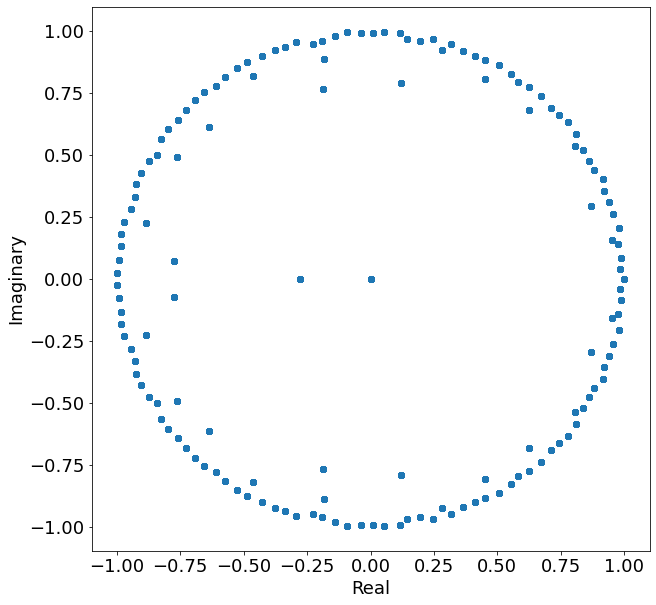

In [25]:
# Compute the eigenvalues of A and plot them in the complex plane
e_vals,e_vecs = np.linalg.eig(A)
# extract real part
x = [e_vals.real for ele in e_vals]
# extract imaginary part
y = [e_vals.imag for ele in e_vals]
  
# plot the complex eigenvalues
plt.scatter(x, y)
plt.ylabel('Imaginary')
plt.xlabel('Real')
plt.show()

# (e)

In [26]:
#Comepute w1 and reconstruct U, then get the approximation of X
w=W[:,0]
Wnew=np.zeros((151,151))
for i in range(151):
      Wnew[:,i]=w
      w=A@w
Wnew.shape


(151, 151)

In [27]:
Xnew=U @ Wnew
movie=[]
for i in range(151):
    M=np.copy(np.real(np.reshape(Xnew[:,i],(449,199))))
    M=255*M
    movie.append(Image.fromarray(M))
movie[0].save('vortallnew.gif', save_all=True, append_images=movie[1:],duration=40, loop=0)

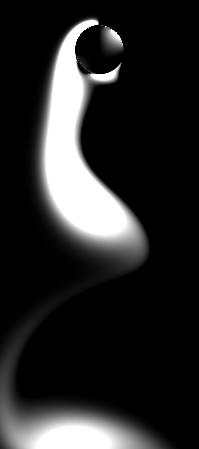